# A simple bandit algorithm
$Initialize \space for \space a$

</p>
$\large a \leftarrow 1 \space to \space k: $
</p>
$\large Q(a) \leftarrow 0$
</p>
$\large N(a) \leftarrow 0$
</p>

$ Loop \space for \space ever:$
$$ \large
A = \begin{cases}
               argmax_a Q(a) \leftarrow with \space probability \space of \space (1 - \epsilon) \\
               a random action \leftarrow with \space probability \space of \space \epsilon \\
            \end{cases}
$$

$$\large R \leftarrow bandit(A) $$
$$\large N(A) \leftarrow N(A) + 1 $$
$$\large Q(A) \leftarrow R(A) + \frac {1}{N(A)} * \Big[ R - Q(A)\Big] $$

In [111]:
import numpy as np

In [112]:
K = 5
Q = np.zeros(K)
N = np.zeros(K)

In [124]:
epsilon = 0.01
action = 0.
rewards = np.random.normal(0,1,K)

In [125]:
for i in range(100000):
    if np.random.normal(size=1) > (1-epsilon):
        action = Q.argmax()
    else:
        action = np.random.randint(1,K)
    reward_val = rewards[action]
    rewardForTheCurrentAction = reward_val + np.random.random()
    N[action] += 1
    error = rewardForTheCurrentAction - Q[action]
    Q[action] += error / N[action]
Q

array([ 0.377429  , -0.55454944,  1.4791857 , -0.13781386, -0.67280698])

In [126]:
Q.max(),Q.min(),Q.argmax()

(1.4791856984592344, -0.6728069776472269, 2)

Putting it all together

### Action Value Reward using simple Average

Given $\large Q_n$ and the $n$th reward, $\large R_n$ , the new average of all $n$ rewards can be computed by:

$\large Q_{n+1} = R_n + \frac {1}{n}  \Big[ R_n - Q_n\Big] \space \space \rightarrow (1)$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random 

In [3]:
class Bandit(object):
    """
    K-armed bandit, default K=10
    """
    def __init__(self, K=10):
        self.action_vals = np.random.normal(0, 1, K)
    
    """
     Bandit[A] returns the actual reward for action A
    """
    def __getitem__(self, action):
        action_val = self.action_vals[action]
        # add some randomness to the reward which is being returned.
        return action_val + np.random.random()
        

In [1]:
class EpsilonGreedyAgent(object):
    
    def __init__(self, Bandit, epsilon=0.1, K=10, init=0):
        self.K = K
        self.epsilon = epsilon
        self.bandit = Bandit(self.K)
        self.Q = np.ones(K) * init
        self.N = np.zeros(K) # Number of times each action has been selected.
    
    def get_action(self):
        #if(np.random.random_sample() > (self.epsilon)):  
        if(np.random.random_sample() > (self.epsilon)):  
            return np.argmax(self.Q)
        else: 
            return np.random.randint(0, 10)
        
    def take_step(self):
        action = self.get_action()
        reward = self.bandit[action]
        self.N[action] += 1
        error = reward - self.Q[action]
        self.Q[action] += (1.0 / self.N[action]) * error
        return reward

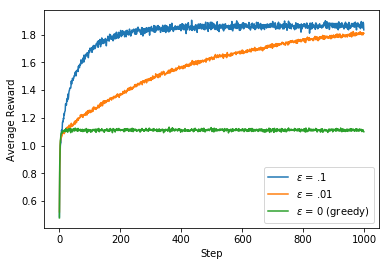

In [4]:
"""Returns reward history of a 1000 step run for a given agent"""   
def thousand_step_run(agent):
    return [agent.take_step() for _ in range(1000)]

"""Average reward of 2000 agents each of which made a 1000 step run"""
def avg_reward(AgentClass, *args):
    reward_history = np.zeros(1000)
    for _ in range(2000):
        agent = AgentClass(*args)
        reward_history = np.add(reward_history, thousand_step_run(agent))
    return reward_history / 2000

x_axis = [x for x in range(1000)]

plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .1), label="$\epsilon$ = .1")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .01), label="$\epsilon$ = .01")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, 0), label="$\epsilon$ = 0 (greedy)")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.legend(loc='best')
plt.show()

In [123]:
np.random.random(10)

array([0.5586335 , 0.70775015, 0.41096466, 0.74761215, 0.33752773,
       0.51493465, 0.18635583, 0.77507613, 0.19240631, 0.70166478])

In [117]:
np.random.uniform(-1,1,10)

array([ 0.07259197, -0.60143858, -0.75053524,  0.87261853,  0.63461867,
       -0.09163503,  0.05455391,  0.90502381, -0.53264608, -0.42688637])

# Tracking a non-stationary problem

we know that from $eq-(1)$

$\large Q_{n+1} = Q_n + \frac {1}{n} (R_n - Q_n)$
</p>
$\large Q_{n+1} = Q_n + \alpha (R_n - Q_n)$ where $ \large \alpha = \frac {1} {n}$
</p>
$\large Q_{n+1} = \alpha R_n + (1- \alpha) Q_n$
</p>
$\large Q_{n+1} = \alpha R_n + (1- \alpha) \Big[ \alpha R_{n-1} + (1- \alpha) Q_{n-1}\Big]$
</p>
$\large Q_{n+1} = \alpha R_n + (1- \alpha) \alpha R_{n-1} + (1- \alpha)^2 Q_{n-1}$

$\large Q_{n+1} = \alpha R_n + (1- \alpha) \alpha R_{n-1} + (1 - \alpha)^2 \alpha R_{n-2} + ... + (1-\alpha)^{n-1} \alpha R_1 + (1-\alpha)^n Q_1$

$\large Q_{n+1} = (1-\alpha)^nQ_1 + \sum\limits_{i=1}^n \alpha(1-\alpha)^{n-i} R_i \rightarrow (2)$

The term in $eq-3$

$\large (1-\alpha)^n+ \sum\limits_{i=1}^n \alpha(1-\alpha)^{n-i}  \rightarrow (3)$

is called **exponential recency weighted average**

for $\alpha = 0$ equation $3$  becomes 1 and for $\alpha = 1$ equation $3$  becomes 0. As programatically shown below

In [156]:
alpha = 0
n = 10
val = (1-alpha)**n + np.array([alpha * (1-alpha)**(n-i) for i in range(n)]).sum()
val

1

In [157]:
alpha = 1
n = 10
val = (1-alpha)**n + np.array([alpha * (1-alpha)**(n-i) for i in range(n)]).sum()
val

0

In [158]:
alpha = .3
n = 10
val = (1-alpha)**n + np.array([alpha * (1-alpha)**(n-i) for i in range(n)]).sum()
val

0.7084742574699998

In [159]:
alpha = .9
n = 10
val = (1-alpha)**n + np.array([alpha * (1-alpha)**(n-i) for i in range(n)]).sum()
val

0.10000000008999997

But of course convergence is not guaranteed for all choices of the sequence $\large \{\alpha_n(a)\}$. A
well-known result in stochastic approximation theory gives us the conditions required to
assure convergence with probability 1:

$$\large \sum\limits_{i=1}^\infty \alpha_n(a) = \infty $$ and $$\large \sum\limits_{i=1}^\infty \alpha^2_n(a) < \infty$$

### Exercise 2.5 (programming)
Design and conduct an experiment to demonstrate the
dificulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use
$\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

In [165]:
class NonStationaryBandit(object):
    
    def __init__(self,K=10):
        self.K = K
        self.action_values = np.ones(K)
    
    def __getitem__(self, action):
        random_steps = [random.uniform(-2, 2) for _ in range(10)]
        self.action_values = np.add(self.action_values, random_steps)
        return self.action_values[action]

In [168]:
class EpsilonGreedyConstStepSize(EpsilonGreedyAgent):
    """An epsilon greedy action value method that uses a constant step-size parameter"""
    
    def __init__(self, Bandit, epsilon, alpha):
        super(EpsilonGreedyConstStepSize, self).__init__(Bandit, epsilon)
        self.alpha = alpha
        
    def take_step(self):
        action = self.get_action()
        reward = self.bandit[action]
        self.N[action] += 1
        self.Q[action] += self.alpha * (reward - self.Q[action]) 
        return reward
    

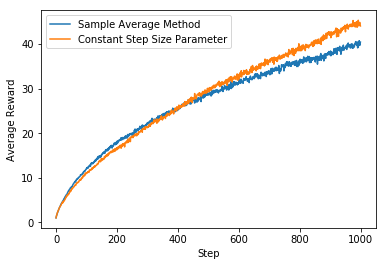

In [169]:
sample_avg_method_reward = avg_reward(EpsilonGreedyAgent, NonStationaryBandit, .1)
const_step_size_reward = avg_reward(EpsilonGreedyConstStepSize, NonStationaryBandit, .1, .1)
plt.plot(x_axis, sample_avg_method_reward, label="Sample Average Method")
plt.plot(x_axis, const_step_size_reward, label="Constant Step Size Parameter")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.legend(loc='best')
plt.show()

### Optimistic Value Initialzation.

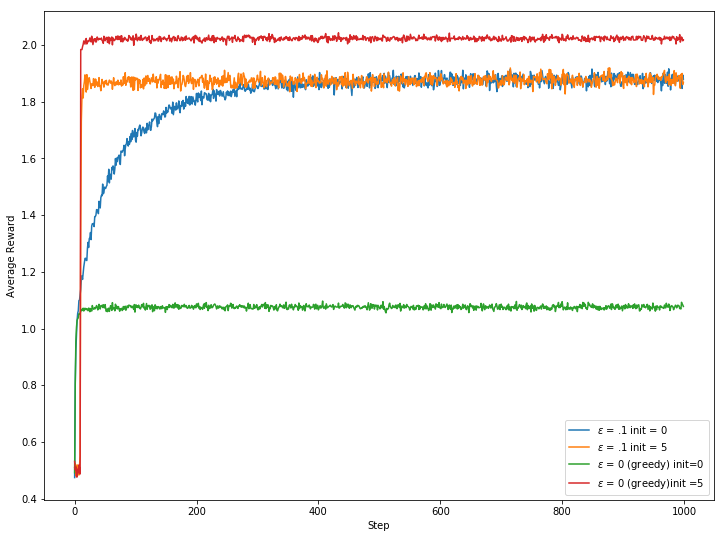

In [16]:
"""Returns reward history of a 1000 step run for a given agent"""   
def thousand_step_run(agent):
    return [agent.take_step() for _ in range(1000)]

"""Average reward of 2000 agents each of which made a 1000 step run"""
def avg_reward(AgentClass, *args, **kwargs):
    reward_history = np.zeros(1000)
    for _ in range(2000):
        agent = AgentClass(*args, **kwargs)
        reward_history = np.add(reward_history, thousand_step_run(agent))
    return reward_history / 2000

x_axis = [x for x in range(1000)]

plt.figure(figsize=(12,9))
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .1, init=0), label="$\epsilon$ = .1 init = 0")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .1, init=5), label="$\epsilon$ = .1 init = 5")

#plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .01), label="$\epsilon$ = .01")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, 0, init=0), label="$\epsilon$ = 0 (greedy) init=0")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, 0, init=5), label="$\epsilon$ = 0 (greedy)init =5")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.legend(loc='best')
plt.show()

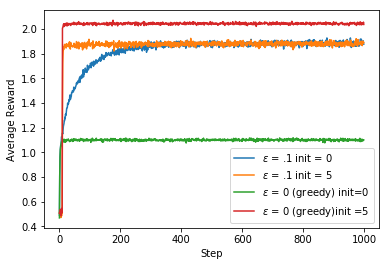

In [10]:
"""Returns reward history of a 1000 step run for a given agent"""   
def thousand_step_run(agent):
    return [agent.take_step() for _ in range(1000)]

"""Average reward of 2000 agents each of which made a 1000 step run"""
def avg_reward(AgentClass, *args, **kwargs):
    reward_history = np.zeros(1000)
    for _ in range(2000):
        agent = AgentClass(*args, **kwargs)
        reward_history = np.add(reward_history, thousand_step_run(agent))
    return reward_history / 2000

x_axis = [x for x in range(1000)]

plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .1, init=0), label="$\epsilon$ = .1 init = 0")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .1, init=5), label="$\epsilon$ = .1 init = 5")

#plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, .01), label="$\epsilon$ = .01")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, 0, init=0), label="$\epsilon$ = 0 (greedy) init=0")
plt.plot(x_axis, avg_reward(EpsilonGreedyAgent, Bandit, 0, init=5), label="$\epsilon$ = 0 (greedy) init=5")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.legend(loc='best')
plt.show()